<a href="https://colab.research.google.com/github/qli447/Lab01/blob/main/%E6%AC%A2%E8%BF%8E%E4%BD%BF%E7%94%A8_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [5]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 132 entries, id to loss
dtypes: float64(15), int64(1), object(116)
memory usage: 189.7+ MB


In [6]:
df = df[df['loss']>100]

(array([3.0000e+01, 3.7000e+01, 6.4000e+01, 1.3600e+02, 2.6800e+02,
        6.1700e+02, 1.2270e+03, 2.2360e+03, 5.3970e+03, 8.5210e+03,
        1.1682e+04, 1.3725e+04, 1.5582e+04, 1.7165e+04, 1.7563e+04,
        1.7054e+04, 1.5940e+04, 1.4375e+04, 1.2934e+04, 1.0671e+04,
        8.4110e+03, 5.8200e+03, 4.0090e+03, 2.4070e+03, 1.2790e+03,
        6.3100e+02, 2.8600e+02, 1.1900e+02, 3.9000e+01, 1.7000e+01,
        7.0000e+00, 3.0000e+00, 3.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([ 4.62536489,  4.82760153,  5.02983816,  5.23207479,  5.43431143,
         5.63654806,  5.83878469,  6.04102133,  6.24325796,  6.44549459,
         6.64773123,  6.84996786,  7.05220449,  7.25444113,  7.45667776,
         7.65891439,  7.86115103,  8.06338766,  8.26562429,  8.46786093,
         8.67009756,  8.87233419,  9.07457083,  9.27680746,  9.47904409,
         9.68128073,  9.88351736, 10.08575399, 10.28799063, 10.49022726,
        10.69246389, 10.89470053, 11.09693716, 11.29917379, 11.50141043,
        11.

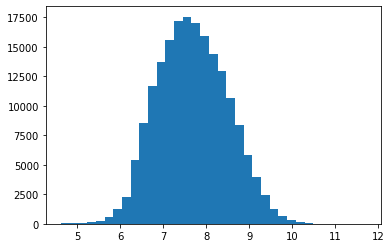

In [21]:
import matplotlib.pyplot as plt

plt.hist(np.log(df['loss']),bins=35)

(array([1.35522e+05, 3.74730e+04, 1.01490e+04, 3.20200e+03, 1.12700e+03,
        4.14000e+02, 1.89000e+02, 9.20000e+01, 3.90000e+01, 1.50000e+01,
        1.10000e+01, 4.00000e+00, 6.00000e+00, 2.00000e+00, 4.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.02040000e+02, 3.55661743e+03, 7.01119486e+03, 1.04657723e+04,
        1.39203497e+04, 1.73749271e+04, 2.08295046e+04, 2.42840820e+04,
        2.77386594e+04, 3.11932369e+04, 3.46478143e+04, 3.81023917e+04,
        4.15569691e+04, 4.50115466e+04, 4.84661240e+04, 5.19207014e+04,
        5.53752789e+04, 5.88298563e+04, 6.22844337e+04, 6.57390111e+04,
        6.91935886e+04, 7.26481660e+04, 7.61027434e+04, 7.95573209e+04,
        8.30118983e+04, 8.64664757e+04, 8.99210531e+04,

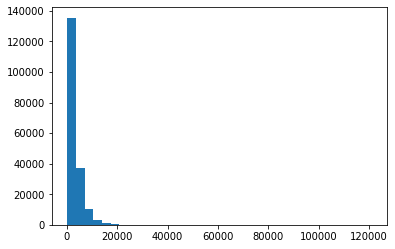

In [22]:
plt.hist(df['loss'],bins=35)

In [9]:
#Convert categoricals into dummies
del df['id']
objects = []
for c in df.columns:
 if str(df[c].dtype) == 'object':
   objects.append(c)
X_ = df.drop(objects, axis = 1).astype('float64')
X_ = X_.drop(['loss'], axis = 1)
dummies = pd.get_dummies(df[objects], drop_first=True)
X = pd.concat([X_, dummies], axis = 1)
y = df.loss

In [10]:
X

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,cat1_B,cat2_B,cat3_B,cat4_B,cat5_B,cat6_B,cat7_B,cat8_B,cat9_B,cat10_B,cat11_B,cat12_B,cat13_B,cat14_B,cat15_B,cat16_B,cat17_B,cat18_B,cat19_B,cat20_B,cat21_B,cat22_B,cat23_B,cat24_B,cat25_B,cat26_B,...,cat116_LU,cat116_LV,cat116_LW,cat116_LX,cat116_LY,cat116_M,cat116_MA,cat116_MB,cat116_MC,cat116_MD,cat116_ME,cat116_MF,cat116_MG,cat116_MH,cat116_MI,cat116_MJ,cat116_MK,cat116_ML,cat116_MM,cat116_MN,cat116_MO,cat116_MP,cat116_MQ,cat116_MR,cat116_MS,cat116_MT,cat116_MU,cat116_MV,cat116_MW,cat116_O,cat116_P,cat116_Q,cat116_R,cat116_S,cat116_T,cat116_U,cat116_V,cat116_W,cat116_X,cat116_Y
0,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,0,1,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188313,0.347403,0.785784,0.613660,0.473202,0.939556,0.242437,0.289949,0.24564,0.30859,0.32935,0.223038,0.220003,0.333292,0.208216,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188314,0.507661,0.555782,0.549770,0.802892,0.704268,0.334270,0.382000,0.63475,0.40455,0.47779,0.307628,0.301921,0.318646,0.305872,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188315,0.484469,0.785784,0.792378,0.189137,0.482436,0.345883,0.370534,0.24564,0.45808,0.47779,0.445614,0.443374,0.339244,0.503888,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
188316,0.438385,0.422197,0.298977,0.383428,0.340543,0.704364,0.562866,0.34987,0.44767,0.53881,0.863052,0.852865,0.654753,0.721707,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# Split data into training and test sets
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)
y_train = np.log(y_train)
y_test = np.log(y_test)

In [24]:
OLS_reg = sm.OLS(y_train, X_train).fit()
OLS_reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   loss   R-squared:                       0.535
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     51.33
Date:                Mon, 18 Oct 2021   Prob (F-statistic):               0.00
Time:                        04:06:00   Log-Likelihood:                -31139.
No. Observations:               37651   AIC:                         6.393e+04
Df Residuals:                   36824   BIC:                         7.099e+04
Df Model:                         826                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cont1         -0.2808      0.132     -2.120      0.034      -0.540      -0.021
cont2          0.2513      0.031      8.039      0.000       0.190       0.313
cont3          0.2396      0.092      2.592      0.010       0.058       0.421
cont4          0.0232      0.083      0.281      0.779      -0.139       0.185
cont5         -0.0603      0.026     -2.359      0.018      -0.110      -0.010
cont6          0.0131      0.160      0.082      0.935      -0.301       0.327
cont7          0.2436      0.072      3.379      0.001       0.102       0.385
cont8          0.0760      0.037      2.026      0.043       0.002       0.149
cont9          0.2458      0.096      2.566      0.010       0.058       0.434
cont10         0.0769      0.117      0.660      0.510      -0.152       0.305
cont11        -0.0889      0.179     -0.497      0.619      -0.439       0.261
cont12        -0.1164      0.228     -0.511      0.610      -0.564       0.331
cont13         0.3490      0.244      1.432      0.152      -0.129       0.827
cont14        -0.1078      0.075     -1.432      0.152      -0.255       0.040
cat1_B        -0.0916      0.008    -11.298      0.000      -0.108      -0.076
cat2_B         0.2446      0.114      2.144      0.032       0.021       0.468
cat3_B         0.0439      0.030      1.454      0.146      -0.015       0.103
cat4_B         0.0234      0.106      0.220      0.826      -0.185       0.231
cat5_B         0.1852      0.039      4.750      0.000       0.109       0.262
cat6_B         0.9602      0.800      1.200      0.230      -0.608       2.529
cat7_B         0.1304      0.038      3.425      0.001       0.056       0.205
cat8_B         0.1817      0.134      1.354      0.176      -0.081       0.445
cat9_B        -0.0061      0.047     -0.130      0.897      -0.098       0.086
cat10_B        0.0783      0.046      1.715      0.086      -0.011       0.168
cat11_B        0.0842      0.046      1.848      0.065      -0.005       0.174
cat12_B        0.2618      0.046      5.744      0.000       0.172       0.351
cat13_B        0.0901      0.046      1.978      0.048       0.001       0.179
cat14_B       -0.2951      0.082     -3.595      0.000      -0.456      -0.134
cat15_B       -0.0763      0.376     -0.203      0.839      -0.813       0.660
cat16_B       -0.0133      0.055     -0.241      0.810      -0.121       0.095
cat17_B        0.0019      0.061      0.031      0.976      -0.117       0.120
cat18_B        0.0024      0.062      0.040      0.968      -0.118       0.123
cat19_B        0.0905      0.059      1.527      0.127      -0.026       0.207
cat20_B       -0.1272      0.100     -1.267      0.205      -0.324       0.070
cat21_B       -0.0885      0.076     -1.169      0.242      -0.237       0.060
cat22_B        0.0049      0.157      0.031      0.975      -0.304       0.313
ca

In [18]:
alphas = np.array([0.000003, 0.000007, 0.00001])
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []
MSE = []
for a in alphas:
 lasso.set_params(alpha=a)
 lasso.fit(X_train, y_train)
 coefs.append(lasso.coef_)
 MSE.append(mean_squared_error(y_test, lasso.predict(X_test)))

In [30]:
np.sqrt(MSE)

array([0.56486849, 0.56413959, 0.56390469])

In [34]:
lambdas = np.logspace(-10,0,11)

In [ ]:
coefs = Lasso(fit_intercept=False)
coefs1=[]

for a in lambdas:
  coefs.set_params(alpha=a)
  coefs.fit(X_train, y_train)
  coefs1.append(coefs.coef_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6024.471671387534, tolerance: 225.23027481926886
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6024.487596933577, tolerance: 225.23027481926886
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6024.645470965093, tolerance: 225.23027481926886
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6026.1673

In [ ]:
ax= plt.gca()
ax.plot(lamdas,coefs1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('lamda')
plt.ylabel('coefficients')
plt.title('Lasso Path')
plt.axis('tight')
plt.show()

In [ ]:
from sklearn.linear_model import LassoCV
model_lasso =LassoCV(alphas=lamdas, normalize = True, cv=5).fit(X_train, Y_train)
lasso_best_lamda = model_lasso.alpha_